In [34]:
!pip install uproot awkward lz4 xxhash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
import uproot
f=uproot.open ("/content/drive/MyDrive/B2HHH_MagnetDown.root")
f.keys()

['DecayTree;1']

In [36]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt
tree=f["DecayTree"].arrays(library="np")

In [37]:
#defining useful classes and functions
class Daughter:
  def __init__(self, tree, name):
    self.PX=tree["{}_PX".format(name)]
    self.PY=tree["{}_PY".format(name)]
    self.PZ=tree["{}_PZ".format(name)]
    self.PTOT=sqrt(square(self.PX)+square(self.PY)+square(self.PZ))#total momentum of the daughter particle
    self.ProbK=tree["{}_ProbK".format(name)]
    self.ProbPi=tree["{}_ProbPi".format(name)]

  def getTotalEnergy(self, mass):
    return  sqrt(square(self.PTOT)+mass**2)#total energy of the particle

def totalMomentumMother(H1,H2,H3):
  return sqrt(square(H1.PX+H2.PX+H3.PX)+square(H1.PY+H2.PY+H3.PY)+square(H1.PZ+H2.PZ+H3.PZ))

def massMother(H1,H2,H3,mass):
  return sqrt(square(H1.getTotalEnergy(mass)+H2.getTotalEnergy(mass)+H3.getTotalEnergy(mass))-square(totalMomentumMother(H1,H2,H3)))





In [38]:
#creating the istances for the three daughter particles
H1=Daughter(tree,'H1')
H2=Daughter(tree,'H2')
H3=Daughter(tree,'H3')


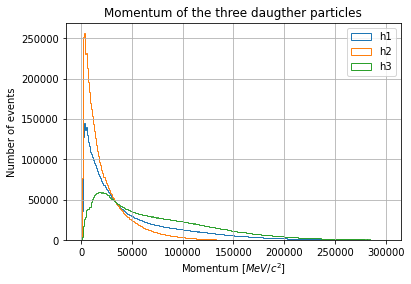

In [39]:
#plotting the hystogram
plt.hist(H1.PTOT,300,(0,300000),histtype='step',label='h1');
plt.hist(H2.PTOT,300,(0,300000),histtype='step',label='h2'); 
plt.hist(H3.PTOT,300,(0,300000),histtype='step',label='h3');  #the semicolon avoid printing the all array

plt.legend(loc='upper right');
plt.title("Momentum of the three daugther particles");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

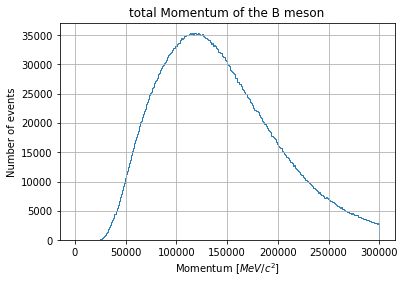

In [40]:
#Calculating the total momentum of the mother 
mother_ptot=totalMomentumMother(H1,H2,H3)


plt.hist(mother_ptot,300,(0,300000),histtype='step');

plt.title("total Momentum of the B meson");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

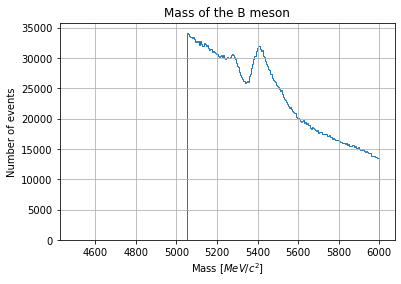

In [41]:
#total mass of the mother
massK=493.677
mass_mother=massMother(H1,H2,H3,massK)

plt.hist(mass_mother,300,(4500,6000),histtype='step');

plt.title("Mass of the B meson");
plt.xlabel('Mass [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();

#Does this match what we would expect from theory?

**ADD HERE EXPLANATION**

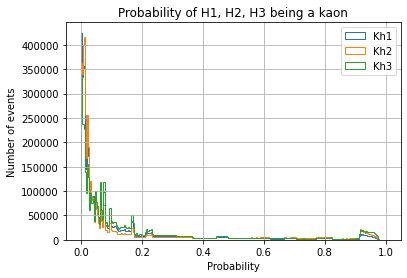

In [42]:
#Make plots of H1/H2/H3 _ProbK on one plot
plt.hist(H1.ProbK,300,(0,1),histtype='step',label='Kh1');
plt.hist(H2.ProbK,300,(0,1),histtype='step',label='Kh2');
plt.hist(H3.ProbK,300,(0,1),histtype='step',label='Kh3');
plt.title("Probability of H1, H2, H3 being a kaon");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.legend(loc='upper right');
plt.grid();

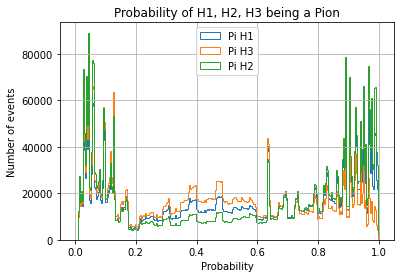

In [43]:
#Make plots of H1/H2/H3 _ProbPi on one plot
plt.hist(H1.ProbPi,300,(0,1),histtype='step',label='Pi H1');
plt.hist(H3.ProbPi,300,(0,1),histtype='step',label='Pi H3');
plt.hist(H2.ProbPi,300,(0,1),histtype='step',label='Pi H2');
plt.legend(loc='upper center');
plt.title("Probability of H1, H2, H3 being a Pion");
plt.xlabel('Probability');
plt.ylabel('Number of events');
plt.grid();


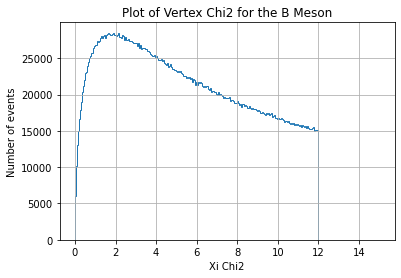

In [44]:
#make a plot of the B_VertexChi2
plt.hist(tree["B_VertexChi2"],300,(0,15),histtype='step',label='B vertex ki');

plt.xlabel('Xi Chi2');
plt.ylabel('Number of events');
plt.title("Plot of Vertex Chi2 for the B Meson");
plt.grid();

In [45]:
#Making the selction
selection="(H1_ProbK>0.4) & (H2_ProbK>0.4) & (H3_ProbK>0.4) & (H1_ProbPi<0.3) & (H1_isMuon==0) & (H2_isMuon==0) &(H3_isMuon==0)& (H2_ProbPi<0.3) & (H3_ProbPi<0.3)"
cutTree=f["DecayTree"].arrays(library="np",cut=selection)



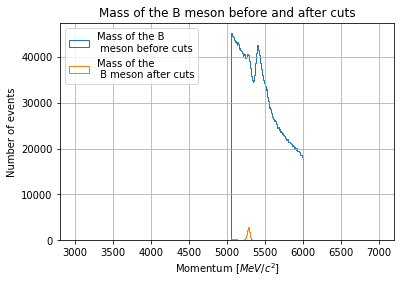

In [46]:
H1_cut=Daughter(cutTree,'H1')
H2_cut=Daughter(cutTree,'H2')
H3_cut=Daughter(cutTree,'H3')


mass_mother_cut=massMother(H1_cut,H2_cut,H3_cut,massK)

plt.hist(mass_mother,300,(4000,6000),histtype='step',label="Mass of the B \n meson before cuts");
plt.hist(mass_mother_cut,300,(3000,7000),histtype='step',label="Mass of the \n B meson after cuts");
plt.legend(loc='upper left');
plt.title("Mass of the B meson before and after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid();


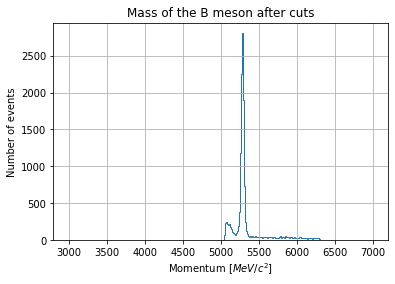

In [47]:
#mother cut alone

plt.hist(mass_mother_cut,300,(3000,7000),histtype='step');
plt.title("Mass of the B meson after cuts");
plt.xlabel('Momentum [$MeV/c^2$]');
plt.ylabel('Number of events');
plt.grid()

#What do you notice about your histogram now?


**Add here explanation**
